<a href="https://colab.research.google.com/github/btramduong0810/dsc-mod-1-project-v2-1-online-ds-sp-000/blob/master/Data_Science_in_Action_The_Movie_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

* Student name: **BAO TRAM DUONG**
* Student pace: **SELF-PACED DATA SCIENCE PROGRAM**
* Scheduled project review date/time: 
* Instructor name: **JEFF HERMAN**
* Blog post URL:


# **Part III. B: Table of Contents**

**1.  Introduction**

1.1  Business Statement

**2.  Data Visualization**

**Question 4:** When is the best time of year to release a movie, in term of month and day of the week?

        2.8.  Release time vs. Worldwide Profit
        
             2.8a. General trend                
             2.8b. Top 100 performers trend
        
        2.8c. Number of movies released per month
        
**Question 5**: Is runtime a factor in determining the success of a movie?

        2.9  Runtime vs. Worldwide Profit
        
             2.9a. General trend
             2.9b. Top 100 performers trend     
             2.9c. Top 100 performers with respect Worldwide Profit
             
**Extra:** What is the best studio to work with?

        2.10 Studio vs. Worldwide Profit
        
             2.10a. General trend
             2.10b. Top 100 performers trend
             2.10c. Top 100 performers with respect to Production Budget & Worldwide Profit   

**3. Actionable Insights**

**4. Conclusion and Future Work**

4.1  Summary of Findings

4.3  Future Works

# **1. INTRODUCTION**

## **1.1 Business Statement**

**Q1.** Is there a correlation between production budget and profit? If so, how much should Microsoft invest into production?

**Q2.** What kind of movie contents, in terms of genre, source, creative type, production method, perform the best?

**Q3.** Is there a correlation between popularity and positive words of mouth (average rating) and profit? How do they affect the performance of a movie?

**Q4.** When is the best time of year to release a movie?

**Q5.** Is there a correlation between runtime and profit? What is the best runtime?


# **2. DATA VISUALIZATION**

## Display the full dataset

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context("talk", rc={"lines.linewidth": 2})
sns.set_style('darkgrid')

In [45]:
#read data
full_df = pd.read_csv('full_df', index_col = 0)

#preview
full_df.head()

,movie,release_year,studio,language,popularity,runtime_minutes,average_rating,num_votes,release_date,genre,...,creative_type,production_budget,domestic_gross,international_gross,worldwide_gross,worldwide_profit,domestic_profit,international_profit,worldwide_profit_margin,budget_range
0,Avengers: Age of Ultron,2015,BV,en,44.383,141.0,7.3,665594,2015-05-01,Action,...,Super Hero,365000000,459005868,937093334,1396099202,1031099202,94005868,572093334,73.855726,>200M
1,Avengers: Infinity War,2018,BV,en,80.773,149.0,8.5,670926,2018-04-27,Action,...,Super Hero,300000000,678815482,1365725041,2044540523,1744540523,378815482,1065725041,85.326777,>200M
2,Justice League,2017,WB,en,34.953,120.0,6.5,329135,2017-11-17,Action,...,Super Hero,300000000,229024295,426920914,655945209,355945209,-70975705,126920914,54.264473,>200M
3,Spectre,2015,Sony,en,30.318,148.0,6.8,352504,2015-11-06,Action,...,Contemporary Fiction,300000000,200074175,679426585,879500760,579500760,-99925825,379426585,65.889740,>200M
4,The Dark Knight Rises,2012,WB,en,26.220,164.0,8.4,1387769,2012-07-20,Action,...,Super Hero,230000000,448139099,634089008,1082228107,852228107,218139099,404089008,78.747549,>200M


In [46]:
#list of attributes
full_df.columns

Index(['movie', 'release_year', 'studio', 'language', 'popularity',
       'runtime_minutes', 'average_rating', 'num_votes', 'release_date',
       'genre', 'source', 'production_method', 'creative_type',
       'production_budget', 'domestic_gross', 'international_gross',
       'worldwide_gross', 'worldwide_profit', 'domestic_profit',
       'international_profit', 'worldwide_profit_margin', 'budget_range'],
      dtype='object')

## Question 4: When is the best time of year to release a movie?

To answer this question, let's look at 'release_date'

In [47]:
#look at 'release_date' column
#create sub dataset
full_df[['release_date', 'movie', 'worldwide_profit']].head()

,release_date,movie,worldwide_profit
0,2015-05-01,Avengers: Age of Ultron,1031099202
1,2018-04-27,Avengers: Infinity War,1744540523
2,2017-11-17,Justice League,355945209
3,2015-11-06,Spectre,579500760
4,2012-07-20,The Dark Knight Rises,852228107


In [48]:
import datetime
#add 'release_month' column
full_df['release_month'] = pd.DatetimeIndex(full_df['release_date']).month

In [49]:
full_df[['release_date', 'release_month', 'movie', 'worldwide_profit']].head()

,release_date,release_month,movie,worldwide_profit
0,2015-05-01,5,Avengers: Age of Ultron,1031099202
1,2018-04-27,4,Avengers: Infinity War,1744540523
2,2017-11-17,11,Justice League,355945209
3,2015-11-06,11,Spectre,579500760
4,2012-07-20,7,The Dark Knight Rises,852228107


### Month

Let's first see when the majority of the General Movies are released and compare that to the Top 100 Movies.

In [50]:
#create sub dataset for 'release_month' and 'worldwide_profit' for all movies
release_month_vs_profit = full_df[['release_month', 'movie', 'worldwide_profit']]

#create sub dataset for 'release_month' and 'worldwide_profit' for top 100 performers
release_month_vs_100_profit = full_df[['release_month', 'movie', 'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                                    ascending = False)[:100]

Is there a difference between general 'release_month' and top 100 performers' 'release_month'

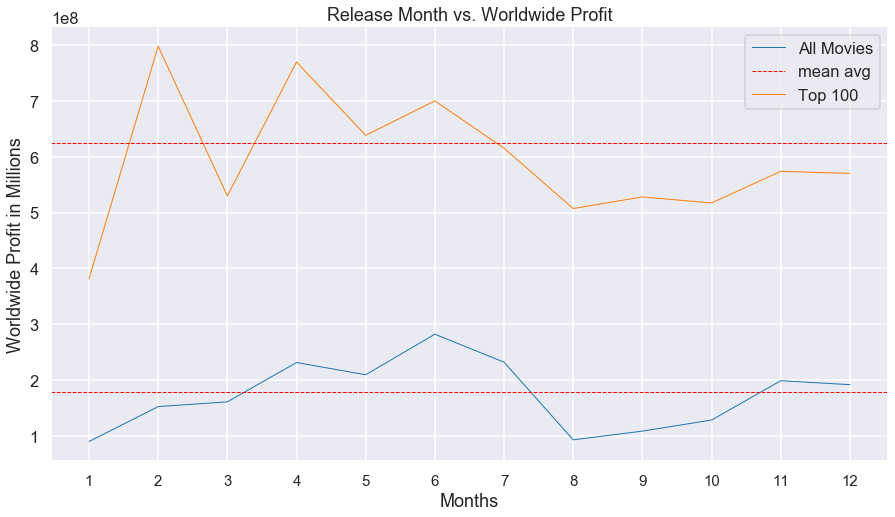

In [51]:
#let's use lineplot to compare the 2 datasets
plt.figure(figsize = (15, 8))

#all movies
sns.lineplot(data = release_month_vs_profit,
             x = 'release_month',
             y = 'worldwide_profit',
             label = 'All Movies',
             linewidth = 1,
             ci = None)

#draw mean()
plt.axhline(release_month_vs_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r', label = 'mean avg')

#top 100 performers
sns.lineplot(data = release_month_vs_100_profit,
             x = 'release_month',
             y = 'worldwide_profit',
             label = 'Top 100',
             linewidth = 1,
             ci = None)

#draw mean()
plt.axhline(release_month_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.legend(loc='upper right')
plt.title('Release Month vs. Worldwide Profit')
plt.xlabel('Months')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(list(range(1, 13)), fontsize = 15)

#show
plt.show()

In [52]:
#save
plt.savefig('release_month_vs_profit_lineplot')

<Figure size 432x288 with 0 Axes>

We observe very similar trends between the General Movies group and the Top 100 Movies group. Only February and April stand out as the difference. Let's investigate.

We do further analysis by looking at the number of movies released per month to see if the high profit is due to the quality of movie or is it just quantity?

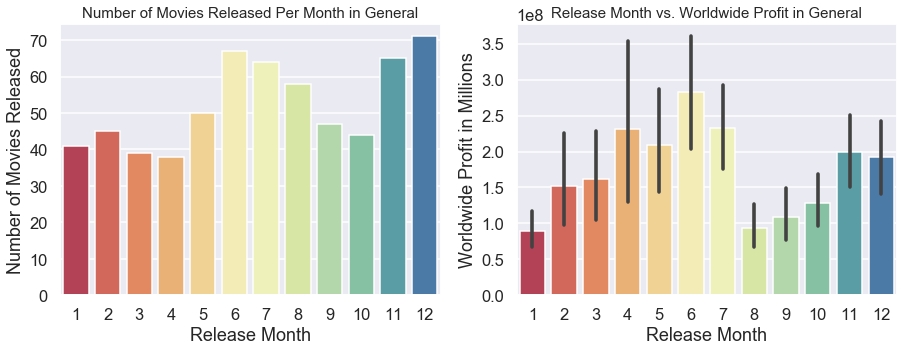

In [53]:
#plot count of movies released per month vs. 'worldwide_profit'
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 5))

#count
sns.catplot(x = 'release_month',
            kind = 'count',
            data = full_df,
            palette = 'Spectral',
            ax = ax[0])

#set labels
ax[0].set_title('Number of Movies Released Per Month in General', fontsize = 15)
ax[0].set_xlabel('Release Month')
ax[0].set_ylabel('Number of Movies Released')

#worldwide_profit
sns.catplot(x = 'release_month',
            y = 'worldwide_profit',
            kind = 'bar',
            data = full_df,
            palette = 'Spectral',
            ax = ax[1])

#set labels
ax[1].set_title('Release Month vs. Worldwide Profit in General', fontsize = 15)
ax[1].set_xlabel('Release Month')
ax[1].set_ylabel('Worldwide Profit in Millions')

#delete extra plots
plt.close(2)
plt.close(3)

In [54]:
#save
plt.savefig('num_movies_release_profit_catplot')

<Figure size 432x288 with 0 Axes>

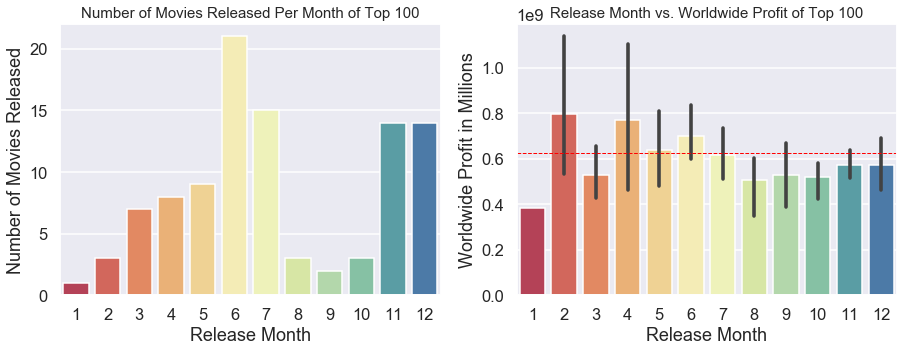

In [55]:
#plot count of movies released per month vs. 'worldwide_profit' for Top 100 performers
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 5))

#count
sns.catplot(x = 'release_month',
            kind = 'count',
            data = release_month_vs_100_profit,
            palette = 'Spectral',
            ax = ax[0])

#set labels
ax[0].set_title('Number of Movies Released Per Month of Top 100', fontsize = 15)
ax[0].set_xlabel('Release Month')
ax[0].set_ylabel('Number of Movies Released')

#worldwide_profit
sns.catplot(x = 'release_month',
            y = 'worldwide_profit',
            kind = 'bar',
            data = release_month_vs_100_profit,
            palette = 'Spectral',
            ax = ax[1])

#draw mean()
ax[1].axhline(release_month_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
ax[1].set_title('Release Month vs. Worldwide Profit of Top 100', fontsize = 15)
ax[1].set_xlabel('Release Month')
ax[1].set_ylabel('Worldwide Profit in Millions')

#delete extra plots
plt.close(2)
plt.close(3)

In [56]:
#save
plt.savefig('num_movies_released_vs_profit_100_catplot')

<Figure size 432x288 with 0 Axes>

Looking at both the General Movies group and the Top 100 Movies group distribution, summer months ( June, July, August) and end of year (November, December) are those that have the highest number of movies released.

In the Top 100 Movies group, all the month perform relatively the same, with February and April peaks but not by much. We don't see a correlation between release month and the movie's success: bad movies and good movies are released about the same time. But it looks like there is a pattern of seasonal releases: summer time vs. Holiday time.

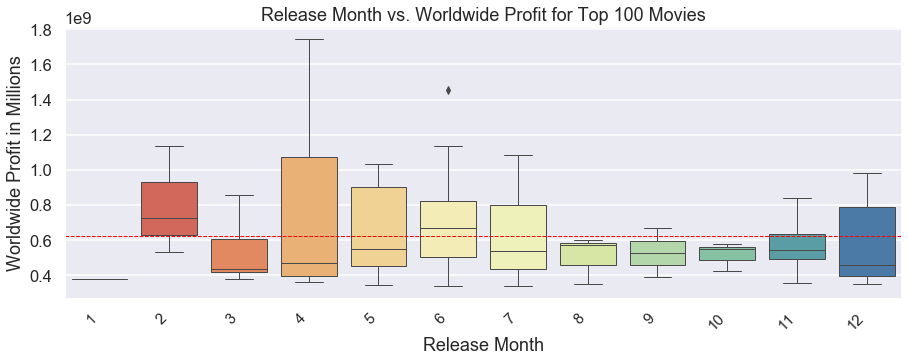

In [57]:
#plot 'release_month' vs. 'worldwide_profit' for top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x = release_month_vs_100_profit['release_month'], 
            y = release_month_vs_100_profit['worldwide_profit'],
            palette = 'Spectral', linewidth = 1)

#draw mean()
plt.axhline(release_month_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Release Month vs. Worldwide Profit for Top 100 Movies')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [58]:
#save
plt.savefig('release_month_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

In the boxplot , when we examine the medians, we see that February and June are the most financially fruitful months. 

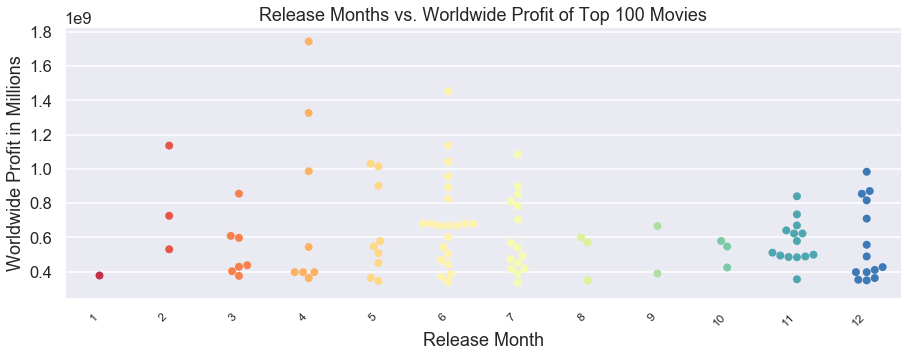

In [59]:
#plot all 'release_month' with respect to 'worldwide_profit' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'release_month',
              y = 'worldwide_profit',
              hue = 'release_month',
              data = release_month_vs_100_profit,
              s = 8, palette = 'Spectral')

#set labels
plt.title('Release Months vs. Worldwide Profit of Top 100 Movies')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Profit in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)

#show
plt.show()

In [60]:
#save
plt.savefig('release_month_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

Looking at the swarmplot, we see that February values are very dispersed while June is more crowded and evenly distributed. This is consistent with our barplot: summer months, beginning with June, is when all studios decide to release the bulk of their movies hence its worldwide profit proportionally increases as the number of movies releases increases.

A few reasons we found for this are:
Movie demand in summer (June, July) is the highest because kids are out of school and parents are looking for ways to entertain them.
A movie released in theater in summer will make it to home video by the time of holiday season (November, December) and studios can capitalize on this.

Therefore, we recommend June to be our month of release.

However, it is important to note that although the report recommends June, the analysis is done pre-Corona virus. We need to take into the account of the COVID-19 outbreak. This pandemic will negatively impact the number movie ticket sales in theater, if movie theater is even allowed to open at all. We recommend to do further analysis on the home video market and streaming movie platforms instead of box office sales.

For future analysis, we recommend doing analysis on release date with both month and day of the week because it can tell us more about the timing and appropriateness of its release schedule when observed together with other competing movie events and also non-movie events such as the weather, news and sport events that can potentially take the audience's attention away from our product. For example, Buena Vista a.k.a Walt Disney Motion Pictures who is the industry's most powerful player and whose movies are dominantly Action/ Adventure, Super Hero, making it our biggest competition. It is undesirable for us to have our release month to be scheduled close to any of Buena Vista/ Disney's releases.

## Question 5: Is runtime a factor in determining the success of a movie?

Finally, let's look at Runtime (runtime_minutes)

In [61]:
#get data statistics
full_df['runtime_minutes'].describe()

count    629.000000
mean     108.430843
std       19.456068
min       40.000000
25%       95.000000
50%      106.000000
75%      120.000000
max      180.000000
Name: runtime_minutes, dtype: float64

In general, movies tend to be in the 108 mins mark. Runtime is range from 40mins to 180mins. Let's look at the plot: 

Let's compare the general trend and the top 100 performers to see what is done differently:

In [62]:
#create sub dataframe for runtime vs. worldwide_profit for top 100 performers
runtime_vs_100_profit = full_df[['runtime_minutes', 
                                 'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                  ascending = False)[:100]
runtime_vs_100_profit.head()

,runtime_minutes,worldwide_profit
1,149.0,1744540523
16,124.0,1454943967
31,137.0,1327179709
59,128.0,1138334005
21,134.0,1136498912


In [63]:
#get data statistics
runtime_vs_100_profit['runtime_minutes'].describe()

count    100.000000
mean     117.750000
std       25.901279
min       40.000000
25%       97.000000
50%      118.000000
75%      136.250000
max      169.000000
Name: runtime_minutes, dtype: float64

* The average runtime in General Movies is 108 minutes.
* The average runtime in Top 100 Movies is 118 minutes.

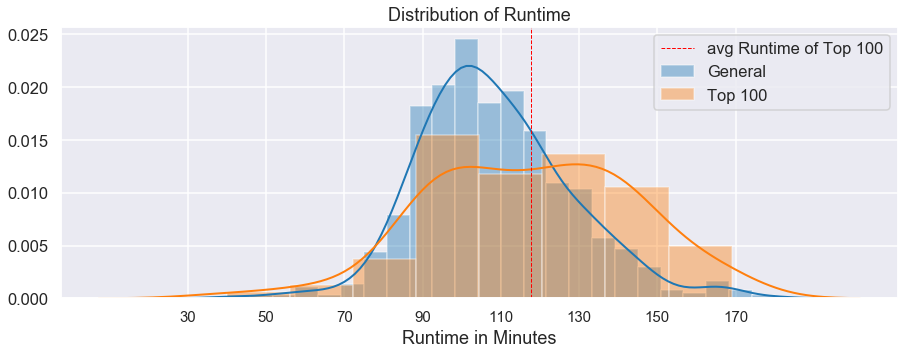

In [64]:
#distribution of 'runtime_minutes'
plt.figure(figsize = (15, 5))

#general
sns.distplot(full_df['runtime_minutes'], label = 'General')

#top 100
sns.distplot(runtime_vs_100_profit['runtime_minutes'], label = 'Top 100')

#draw mean()
plt.axvline(runtime_vs_100_profit['runtime_minutes'].mean(),
           ls = '--', lw = 1, color = 'r', label = 'avg Runtime of Top 100')

#set labels
plt.title('Distribution of Runtime')
plt.xlabel('Runtime in Minutes')
plt.legend()

#set xticks
plt.xticks(np.arange(30, 180, 20), fontsize = 15)

#show
plt.show()

In [65]:
#save
plt.savefig('runtime_distribution_distplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

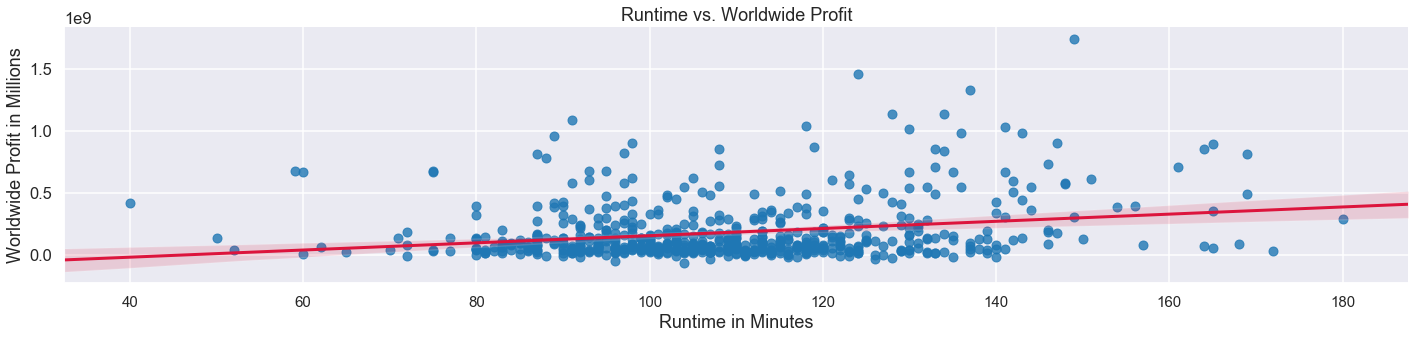

In [66]:
#plot 'runtime' vs. worldwide_profit'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'runtime_minutes',
           y = 'worldwide_profit',
           data = full_df, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Runtime vs. Worldwide Profit')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [67]:
#save
plt.savefig('runtime_vs_profit_lmplot')

<Figure size 432x288 with 0 Axes>

In [68]:
#write r2 function

from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

#get Pearson correlation coefficient
print('The Pearson correlation coefficient is:', r2(full_df['runtime_minutes'], full_df['worldwide_profit']))

The Pearson correlation coefficient is: 0.058964265505367965


Although weak, there is a positive correlation between 'runtime_minutes' and 'worldwide_profit'.

Top 100 performers tends to run with 120mins and longer. Let's confirm this by plotting 'runtime_minutes' with 'worldwide_profit'.

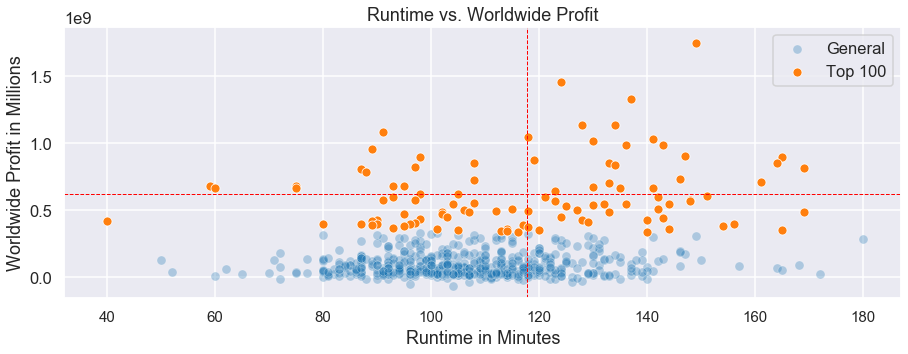

In [69]:
#plot runtime vs. worldwide_profit of top 100 performers
plt.figure(figsize = (15, 5))

#all movies
sns.scatterplot(x = full_df['runtime_minutes'], 
                      y = full_df['worldwide_profit'], 
                      label = 'General', alpha = 0.3)

#top 100 performers
sns.scatterplot(x = runtime_vs_100_profit['runtime_minutes'], 
                      y = runtime_vs_100_profit['worldwide_profit'], 
                      label = "Top 100")

#draw mean()
plt.axhline(runtime_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r', label = 'avg Runtime of Top 100')
plt.axvline(runtime_vs_100_profit['runtime_minutes'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Runtime vs. Worldwide Profit')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [70]:
#save
plt.savefig('runtime_vs_profit_scatterplot')

<Figure size 432x288 with 0 Axes>

As we can see, top performers from runtime_vs_100_profit dataset and the plot, top performers do very well in the range of ~120mins and longer.

## Extra: Who is our competition?

We think it would be informative to look at all other major studios and see who is the biggest player in the industry. Let's look at the General Movies distribution of studios:

In [71]:
#studio_distribution values
y_values = full_df['studio'].value_counts(ascending=False)[:10]
x_values = y_values.index

y_values

Uni.       98
Fox        86
WB         71
BV         59
Par.       50
Sony       50
WB (NL)    42
LGF        32
LG/S       19
SGem       16
Name: studio, dtype: int64

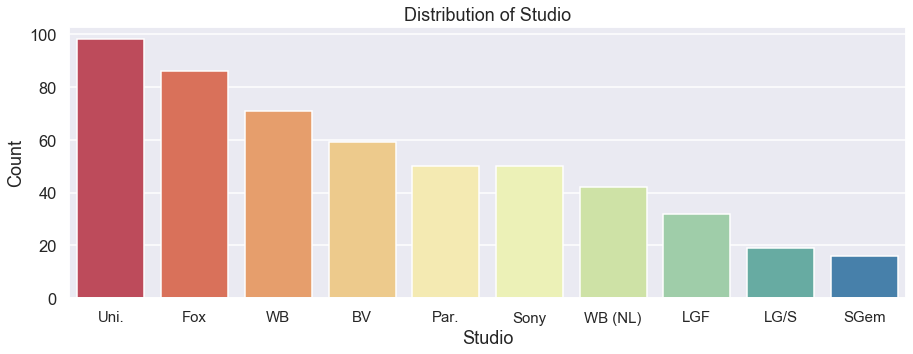

In [72]:
#plot studio distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Studio')
plt.xlabel('Studio')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [73]:
#save
plt.savefig('studio_distribution_barplot')

<Figure size 432x288 with 0 Axes>

Universal Studio, Fox and Warner Bros are the 3 most popular studios. Which one makes the highest profit?

In [74]:
#create sub dataframe for 'studio' and 'worldwide_profit'
studio_vs_100_profit = full_df[['studio', 'production_budget',
                                'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                 ascending = False)[:100]
studio_vs_100_profit.head(10)

,studio,production_budget,worldwide_profit
1,BV,300000000,1744540523
16,Uni.,215000000,1454943967
31,Uni.,190000000,1327179709
59,Uni.,170000000,1138334005
21,BV,200000000,1136498912
207,Uni.,74000000,1085631140
22,BV,200000000,1042805359
0,BV,365000000,1031099202
25,BV,200000000,1015392272
12,Uni.,250000000,986703796


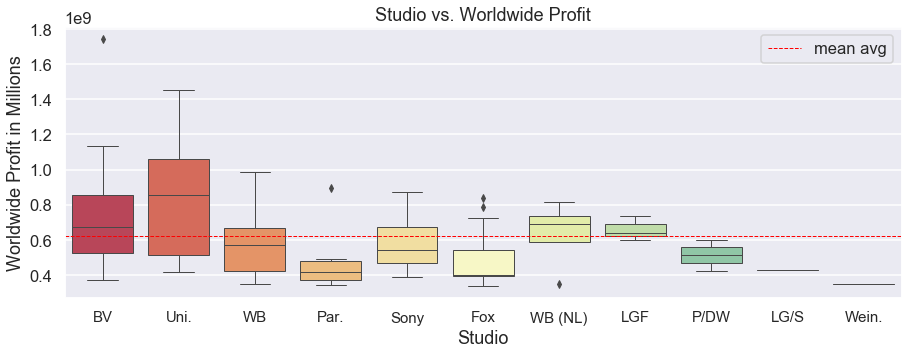

In [75]:
#plot 'studio' vs. 'worldwide_profit' of top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x = studio_vs_100_profit['studio'], 
            y = studio_vs_100_profit['worldwide_profit'],
            palette = 'Spectral',
            linewidth = 1)

#draw mean()
plt.axhline(studio_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Studio vs. Worldwide Profit')
plt.xlabel('Studio')
plt.ylabel('Worldwide Profit in Millions')
plt.legend()

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [76]:
#save
plt.savefig('studio_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

Among film studios, BV or Buena Vista a.k.a. Walt Disney Motion Pictures (rebranded since 2007) has the highest box office market share in North America at over 30% and also pulls in more than double the box office revenue generated by Warner Bros. and Universal (Watson, 2020).

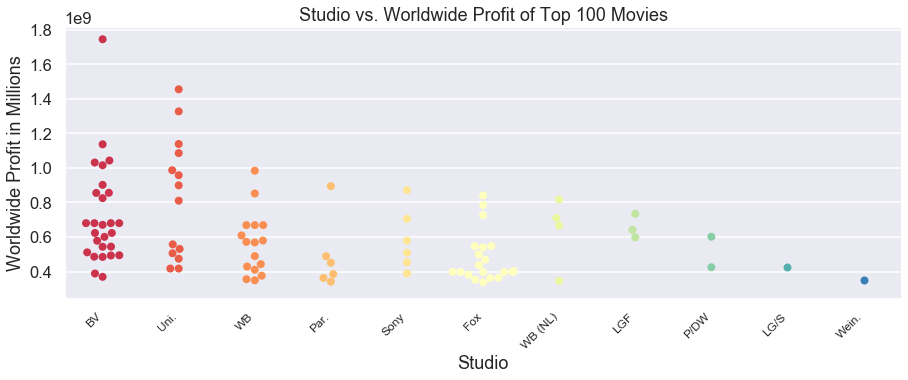

In [77]:
#plot all 'studio' with respect to 'worldwide_profit' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'studio',
              y = 'worldwide_profit',
              hue = 'studio',
              data = studio_vs_100_profit,
              s = 8, palette = 'Spectral')

#set labels
plt.title('Studio vs. Worldwide Profit of Top 100 Movies')
plt.xlabel('Studio')
plt.ylabel('Worldwide Profit in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)

#show
plt.show()

In [78]:
#save
plt.savefig('studio_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

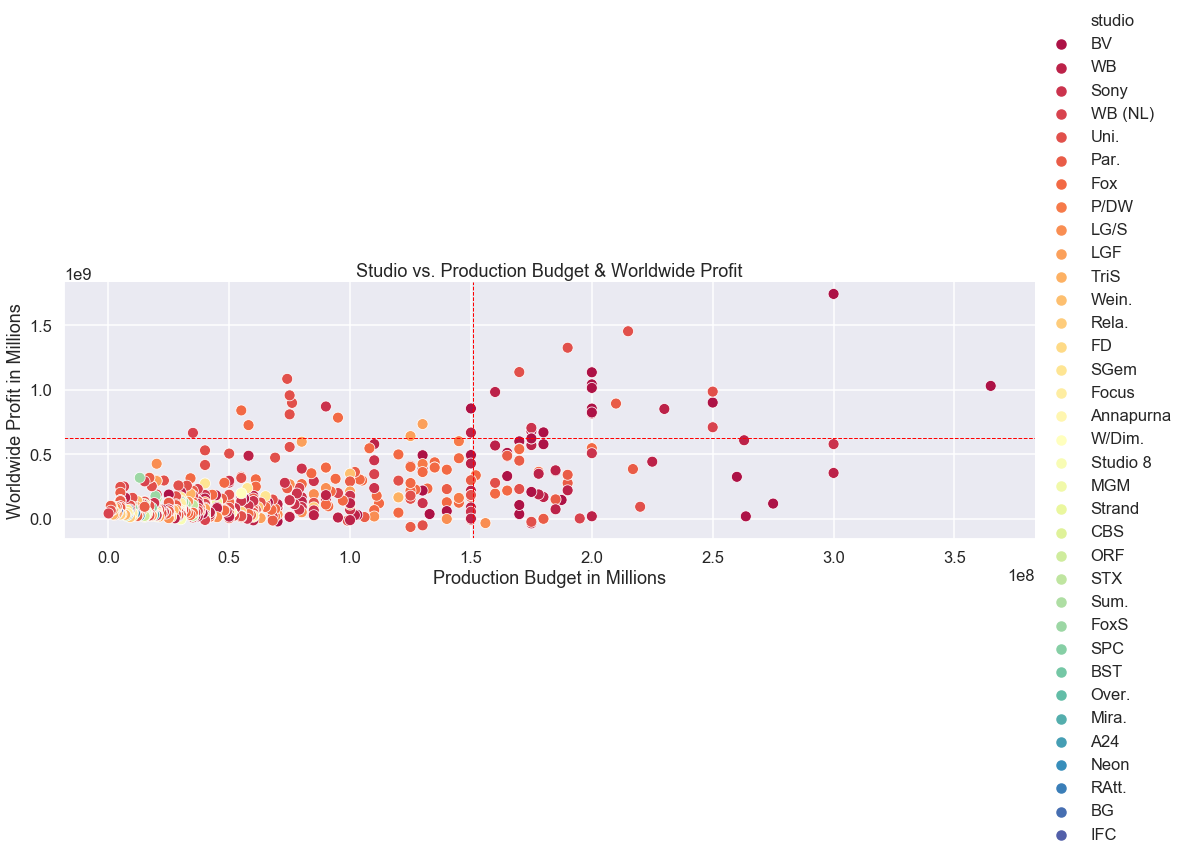

In [79]:
#plot all 'studio' with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'studio',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(studio_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(studio_vs_100_profit['production_budget'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Studio vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#show
plt.show()

In [80]:
#save
plt.savefig('studio_budget_profit_relplot')

<Figure size 432x288 with 0 Axes>

Research on Buena Vista/ Disney reveals that it is creating enormous value in animated/ superhero films targeted at young children and their parents. Since our success formula is Action/ Adventure + Super Hero + Animation/Live Action, we can follow Buena Vista/ Disney business model and the type and content of movies we should make. However, this will put us in direct competition with the King and we intelligently do not want to fight Disney at the box office.

To avoid undesirable competition with Disney, we need to come up with a different recipe for our studio success. Looking at the plot, we note that Buena Vista/ Disney's biggest competitor, Universal Pictures (Uni.), is making a concerted effort to appeal to fans of comedy and horror, British and Chinese audiences, female movie-goers and black audiences (Katz, 2019). Universal Pictures has managed to compete with Buena Vista/ Disney on the global stage without the aid of superheroes (Katz). We recommend Microsoft to adopt this type of diversity into our movie production and come up with something that is uniquely our own.

# 3. SUMMARY OF FINDINGS

**VIII.1. Question 1: Is there a correlation between production budget and profit? If so, how much should Microsoft invest into production?**

Budget vs Profit:
* r2 = 0.358
* Production budget is positively correlated with worldwide profit.
* The average production budget in general is 68M.
* The average worldwide profit in general is 179M.
* The average production budget in top 100 performers is 151M.
* The average worldwide profit of the Top 100 performers is 624M.
Decision: $150M and up

**VIII.2. Question 2: What kind of movie contents, in term of genre, source, creative type, production method, perform the best?**

VIII.2.a. Genre
* The average worldwide profit for the Action genre is 692M.
* The average worldwide profit for the Adventure genre is 591M.
* The average worldwide profit for Thriller/Suspense genre is 587M.
* The average worldwide for Musical genre is 502M.
Decision: Action and Adventure

VIII.2.b. Source
* The average worldwide profit for Based on Comic/Graphic Novel source is 682M.
* The average worldwide profit for Based on Fiction Book/Short Story source is 610M.
* The average worldwide profit for Original Screenplay source is 591M.
Decision: Based on Comic Graphic/ Novel

VIII.2.c. Creative Type
* The average worldwide profit for Super Hero creative type is 683M.
* The average worldwide profit for Based on Science Fiction creative type is 595M.
* The average worldwide profit for Contemporary Fiction creative type is 705M.
Decision: To be decided between Super Hero vs. Contemporary Fiction

VIII.2.d. Production Method
* The average worldwide profit for Animation/Live Action production method is 692M.
* The average worldwide profit for Live Action production method is 606M.
* The average worldwide profit for Digital Animation production method is 606M.
Decision: To be decided between Animation/ Live Action vs. Live Action

**VIII.3. Question 3: Is there a correlation between popularity and positive words of mouth (average rating) and profit? How do they affect the performance of a movie?**

VIII.3.a. Popularity
* r2 = 0.274
* Popularity is positively correlated with worldwide profit.
* Top 100 movies score a 25 on average.
* Bottom 100 movies score a 13.2 on average.
Overall:
* Action & Adventure is the most popular genre.
* Based on Comic Graphic/ Novel is the most popular source.
* Super Hero is the most popular creative type.
* Animation/Live Action is the most popular production method.

VIII.3.b. Rating
* r2 = 0.089
* Rating is positively correlated with worldwide profit but not strongly.
* Top 100 movies score a 7.1 on average.
* General movies score a 6.4 on average.
* Bottom 100 movies score a 6.1 on average.
Genre:
* Thriller/Suspense is the highest rated genre.
* Adventure and Action is the next highest rated genres.
Source:
* Original Screen Play is the highest rated source.
* Based on Comic Graphic/ Novel is the second highest rated source.
Creative Type:
* Science Fiction is the highest rated creative type.
* Super Hero is second highest rated creative type.
Production Method:
* Animation/Live Action is the highest rated production method.

**VIII.4. Question 4: When is the best time of year to release a movie?**

Decision: June

**VIII.5. Question 5: Is there a correlation between runtime and profit? What is the best runtime?**

* r2 = 0.058
* Runtime is positively correlated with worldwide profit but not strongly.
* The average runtime in general is 108 minutes
* The average runtime in top 100 performers is 118 minutes
Decision: 120 mins and up

**VIII.6. Extra: Who is our competition?**

Buena Vista (aka Walt Disney Motion Pictures since 2007)

# 5. SUMMARY OF ACTIONABLE INSIGHTS

Results suggest that the following factors are positively associated with a movie success:

* Production budget = 150M and up
* Genre = Action & Adventure
* Source = Based on comic graphic/ novel
* Creative Type = Super Hero
* Production Method = Animation/ Live Action
* Release month = June
* Runtime = 120 mins and up
* Critics reviews and public rating can be informative.

# **6. CONCLUSION & FUTURE WORKS**

**Future works:**

1. Do analysis in term of ROI instead of simplified worldwide profit
2. Do further analysis between domestic market and international market
3. Motion Picture Association of America (MPAA) rating
4. Star quality: choosing a film where the main actor has received awards and recognition for acting is one of the best predictors of movie success.  In a study published in the Journal of the Academy of Marketing Science, they found that when a movie is first released it is the "star power" of a popular actor that has the strongest impact at the box office (Staff, 2017). 
5. Quality of script
6. Special effects, sound design, music
7. Marketing campaign
8. Popularity of the film preceding it (if it's a sequel)
9. Directors 
10. Writers
11. Critics
12. Diversity: female directors, women of color, Black Lives Matter movement, etc.



# 7. DATA LIMITATIONS

* We used an oversimplified production budget which doesn’t include the additional cost paid to the directors, writers, producers, or lead actors based on how well the movie performs, known as Contingent Compensation (Follows, 2020).

* We used the oversimplified worldwide profit, calculated by subtracting production budget from worldwide gross, to measure a movie’s performance by getting its net income. However, profitability is measured by ROI (return on investment) and profit margin. ROI is profit divided by investment (presented as a percentage) and profit margin is profit divided by revenue (percentage).

* Our worldwide profit does not include DVD sales, rental income, several revenue streams, including theatrical exhibition, home video, television broadcast rights, merchandising, etc.

* We only used movies from 2010–2018, whereas the first “blockbuster” movies such as Jaws (1975), Star Wars (1977), Raiders of the Lost Ark (1981), E.T The Extra-Terrestrial (1982) was way before that (Follows, 2020). Hence, our dataset could be improved on if time permits.

* One thing to note is that studios often try to hide the true cost of a movie. The information available online is normally a mix of true figures which have leaked and educated guesses by industry experts (Follows, 2020).

# Reference

Follows, S. (2020, January 10). How movies make money: $100m+ Hollywood blockbusters. Stephen Follows. https://stephenfollows.com/how-movies-make-money-hollywood-blockbusters/

Katz, B. (2019, September 30). Universal Is Disney’s Chief Rival Because It Isn’t Trying to Be Disney. Observer. https://observer.com/2019/09/abominable-box-office-universal-pictures-disney-warner-bros/

Mullich, D. (N/A). Movies: What determines the success of a movie (by box office revenue)? - Quora. https://www.quora.com/Movies-What-determines-the-success-of-a-movie-by-box-office-revenue

Pressbooks. (2016, March 22). 8.3 Movies and Culture – Understanding Media and Culture. Pressbooks. https://open.lib.umn.edu/mediaandculture/chapter/8-3-movies-and-culture/

Staff, S. X. (2017, November 7). Study explores what really makes a movie successful. Phys.Org. https://phys.org/news/2017-11-explores-movie-successful.html#:%7E:text=Star%20power%2C%20acting%20expertise%2C%20rousing,decision%20to%20see%20a%20movie.&text=In%20fact%2C%20choosing%20a%20film,of%20movie%20success%2C%20says%20Carrillat.

The Numbers. Movie Budgets, Most Expensive Movies, Most Profitable Movies, Biggest Money-Losing Movies. (NA). The Numbers. https://www.the-numbers.com/movie/budgets

Stimpert, J. L., Laux, J. A., Marino, C., & Gleason, G. (2008). Factors Influencing Motion Picture Success: Empirical Review And Update. Journal of Business & Economics Research (JBER), 6(11). https://doi.org/10.19030/jber.v6i11.2488

Towers, G. (2018, September 6). 10 Reasons Why Everyone Has Seen a Superhero Movie - Frame Rated. Medium. https://medium.com/framerated/10-reasons-why-superhero-films-are-so-popular-2ce69d2d93ea#:%7E:text=While%20part%20of%20the%20appeal,relatable%20and%20closer%20to%20home.

Watson, A. (2020, November 10). Film Industry - statistics & facts. Statista. https://www.statista.com/topics/964/film/#:%7E:text=Film%20entertainment%20is%20big%20business,dollars%20in%20revenue%20in%202019.
 

